In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\user\Desktop\Python\Mini_Project\SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3



##  Questions for Your Supermarket Sales Analysis

1. **What is the total sales revenue generated across all branches?**

2. **Which branch has the highest total sales revenue?**

3. **What are the monthly sales trends? Are there months with significantly higher or lower sales?**

4. **Which product line contributes the most to total sales?**

5. **How do sales differ between member customers and normal customers?**

6. **What are the most commonly used payment methods, and how do sales vary by payment type?**

7. **Is there a relationship between customer ratings and total sales?**




In [35]:
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [36]:
df.shape

(1000, 17)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [38]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [39]:
# 1
Total_Revenue = df[['Sales']].sum()
display(Total_Revenue)

Sales    322966.749
dtype: float64

In [40]:
# 2
branch_revenue = df.groupby(df['Branch'])['Sales'].sum()
display(branch_revenue.idxmax())
display(branch_revenue)

'Giza'

Branch
Alex     106200.3705
Cairo    106197.6720
Giza     110568.7065
Name: Sales, dtype: float64

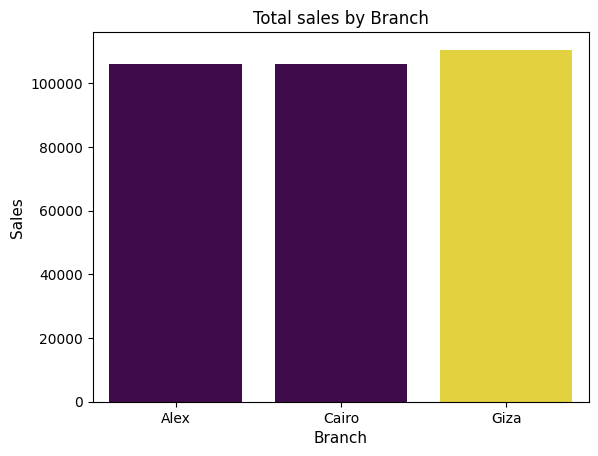

In [41]:
sns.barplot(x=branch_revenue.index,y=branch_revenue,hue=branch_revenue,legend=False, palette='viridis')
plt.title('Total sales by Branch')
plt.xlabel('Branch',size = 11)
plt.ylabel("Sales", size = 11)
plt.show()

In [42]:
# 3
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February


In [43]:
monthly_sales = df.groupby(df['Month'])[['Sales']].sum()
monthly_sales

,Sales
Month,
February,97219.374
January,116291.868
March,109455.507


In [44]:
display(monthly_sales.idxmax())
display(monthly_sales.idxmin())

Sales    January
dtype: object

Sales    February
dtype: object

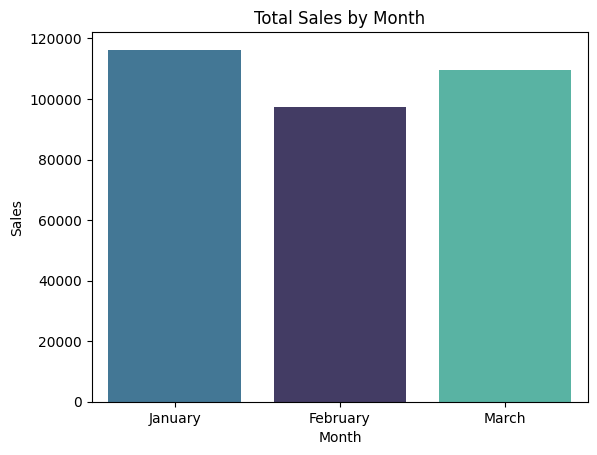

In [45]:
sns.barplot(data=monthly_sales.reset_index(),x='Month',y='Sales', order=['January','February','March'],hue='Month',legend=False, palette='mako')
plt.title('Total Sales by Month')
plt.show()

In [46]:
# 4
product_line_sales = df.groupby(df['Product line'])[['Sales']].sum()
display(product_line_sales)

,Sales
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [47]:
product_line_sales.idxmax()

Sales    Food and beverages
dtype: object

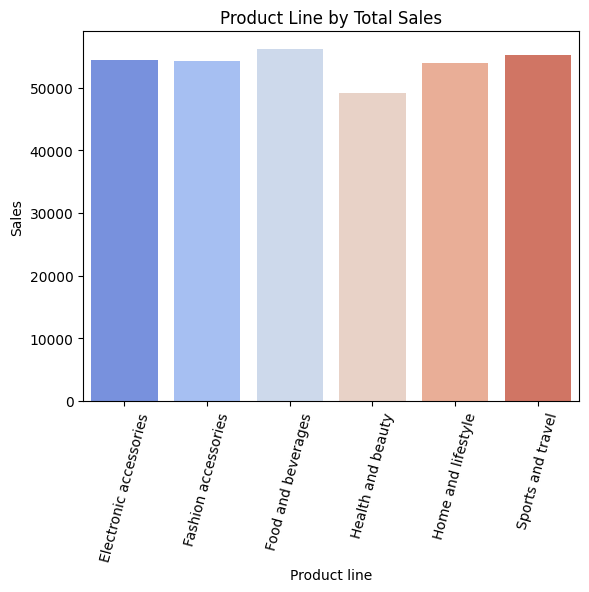

In [48]:
sns.barplot(data=product_line_sales.reset_index(), x='Product line',y='Sales',hue='Product line',legend=False,palette='coolwarm')
plt.xticks(rotation = 75)
plt.title('Product Line by Total Sales')
plt.show()

In [49]:
# 5
customer_sales = df.groupby(df['Customer type'])[['Sales']].sum()
customer_sales = customer_sales.reset_index()
customer_sales

,Customer type,Sales
0,Member,189694.764
1,Normal,133271.985


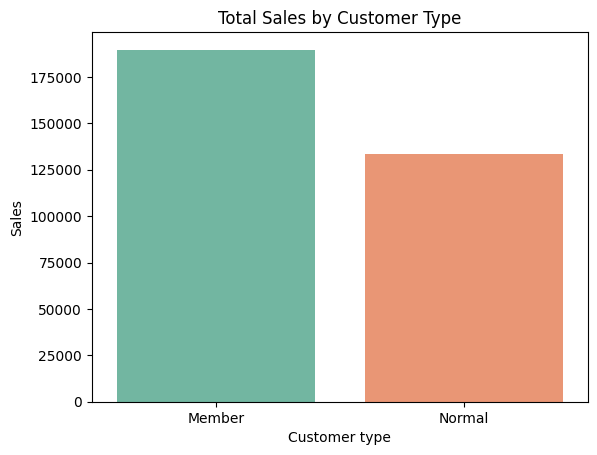

In [50]:
sns.barplot(data=customer_sales,x='Customer type',y='Sales',hue='Customer type',palette='Set2')
plt.title('Total Sales by Customer Type')
plt.show()

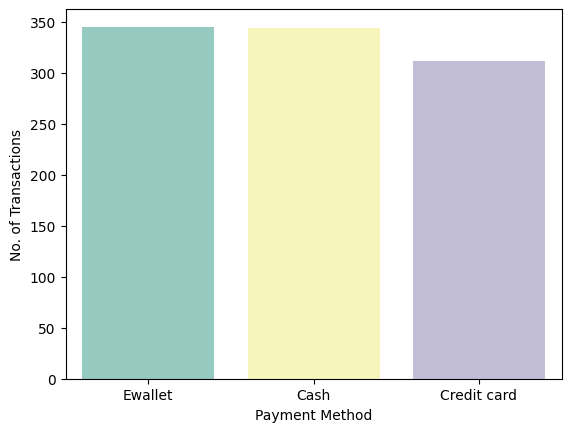

In [51]:
# 6
sns.countplot(x=df['Payment'],data=df,hue=df['Payment'],palette='Set3')
plt.xlabel('Payment Method')
plt.ylabel('No. of Transactions')
plt.show()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

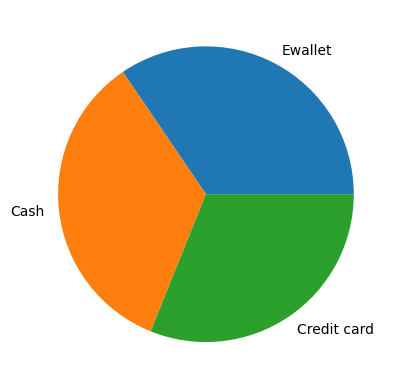

In [52]:
payment_count = df['Payment'].value_counts()
display(payment_count)
plt.pie(x=payment_count,labels=payment_count.index)
plt.show()

<Axes: xlabel='Rating', ylabel='Sales'>

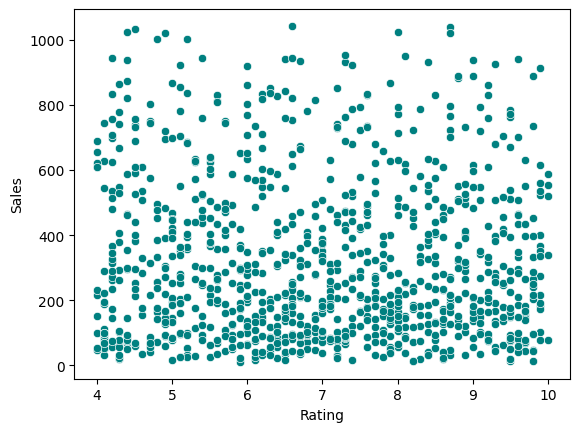

In [53]:
# 7
sns.scatterplot(data=df,x= df['Rating'],y=df['Sales'],color = 'teal')

In [54]:
correlation = df['Rating'].corr(df['Sales'])
print(f"Correlation between Rating and Sales: {correlation:.2f}")


Correlation between Rating and Sales: -0.04


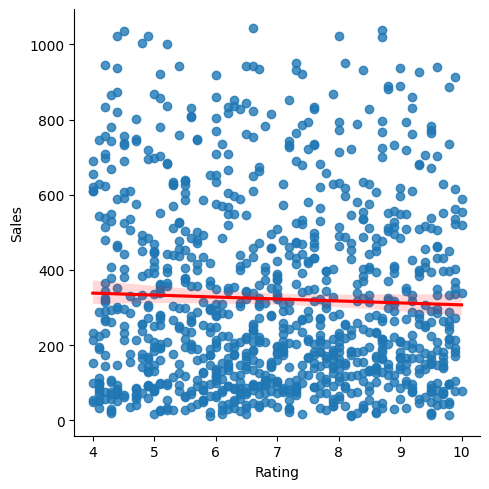

In [55]:
sns.lmplot(data=df, x='Rating',y='Sales', line_kws={'color': 'red'})

8. What is the busiest time of day for sales?
9. Which gender spends more on average?


In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
# 8
df['Hour'] = pd.to_datetime(df['Time'],format='%I:%M:%S %p').dt.hour
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February,10


In [63]:
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int32

In [70]:
df['Period'] = pd.cut(x=df['Hour'], bins=[0,11,16,19,24],labels=['Morning','Afternoon','Evening','Night'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Period
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January,13,Afternoon
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March,10,Morning
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March,13,Afternoon
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January,20,Night
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February,10,Morning


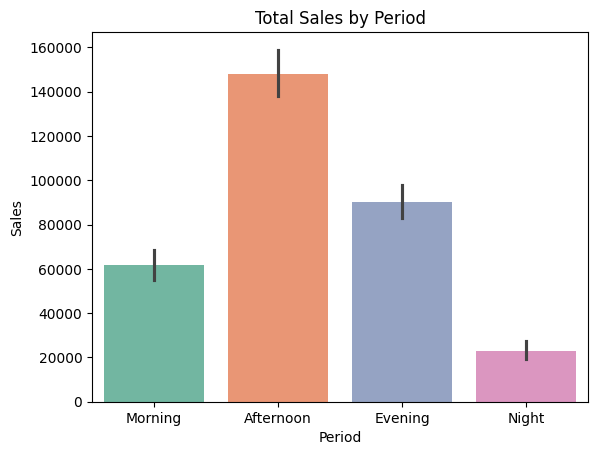

In [86]:
sns.barplot(data=df,x='Period',y='Sales',hue=df['Period'],legend=False,palette='Set2',estimator=sum)
plt.title('Total Sales by Period')
plt.show()

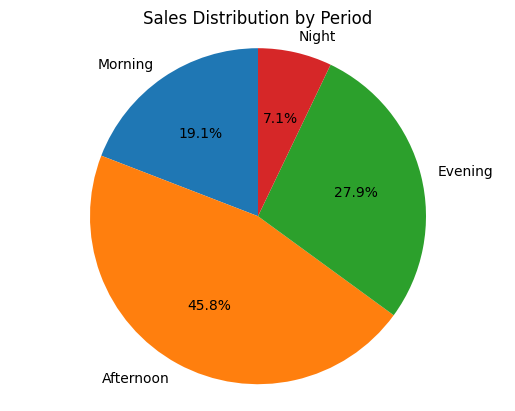

In [ ]:
period_sales = df.groupby(df['Period'],observed=False)['Sales'].sum()
plt.pie(x=period_sales,labels=period_sales.index,autopct='%1.1f%%',startangle=90)
plt.title('Sales Distribution by Period',)
plt.axis('equal')  # Makes the pie chart circular
plt.show()

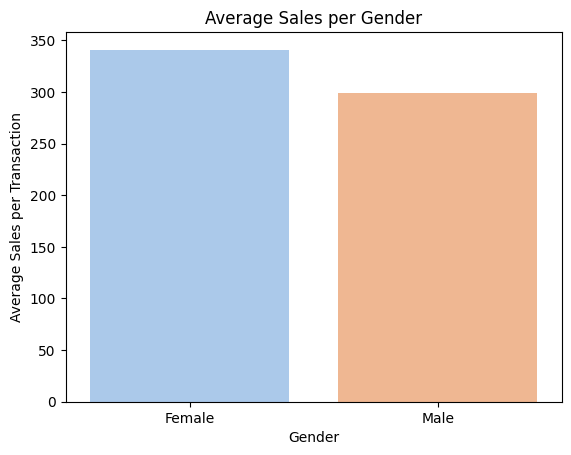

In [92]:
# 8
gender_avg = df.groupby(df['Gender'])['Sales'].mean()
sns.barplot(x=gender_avg.index,y=gender_avg,hue=gender_avg.index,legend=False,palette='pastel')
plt.title('Average Sales per Gender')
plt.ylabel("Average Sales per Transaction")
plt.show()
